In [8]:
import numpy as np
import pandas as pd

#Fin Data Sourcees
import yfinance as yf
import pandas_datareader as pdr

#Data viz
import plotly.graph_objs as go
import plotly.express as px

import time
from datetime import date

## 1) Date Driven Decision data pulls

In [9]:
end = date.today()
print(f'Year = {end.year}; month= {end.month}; day={end.day}')

start = date(year=end.year-70, month=end.month, day=end.day)
print(f'Period for indexes: {start} to {end} ')

Year = 2024; month= 4; day=15
Period for indexes: 1954-04-15 to 2024-04-15 


### 1.1) GDP

In [55]:
# Real Potential Gross Domestic Product (GDPPOT), Billions of Chained 2012 Dollars, QUARTERLY
# https://fred.stlouisfed.org/series/GDPPOT
gdpIndia = pdr.DataReader("NGDPRNSAXDCINQ", "fred", start=start)

In [56]:
gdpIndia["gdpIn"] = gdpIndia['NGDPRNSAXDCINQ']
gdpIndia = gdpIndia.drop(['NGDPRNSAXDCINQ'],axis=1)

In [60]:
gdpIndia['gdpIn_yoy'] = gdpIndia.gdpIn/gdpIndia.gdpIn.shift(4)-1
gdpIndia['gdpIn_qoq'] = gdpIndia.gdpIn/gdpIndia.gdpIn.shift(4)-1
gdpIndia.tail()

,gdpIn,gdpIn_yoy,gdpIn_qoq
DATE,,,
2022-07-01,38780000.0,0.061983,0.061983
2022-10-01,40226300.0,0.044630,0.044630
2023-01-01,43615100.0,0.060586,0.060586
2023-04-01,40371400.0,0.078212,0.078212
2023-07-01,41743100.0,0.076408,0.076408


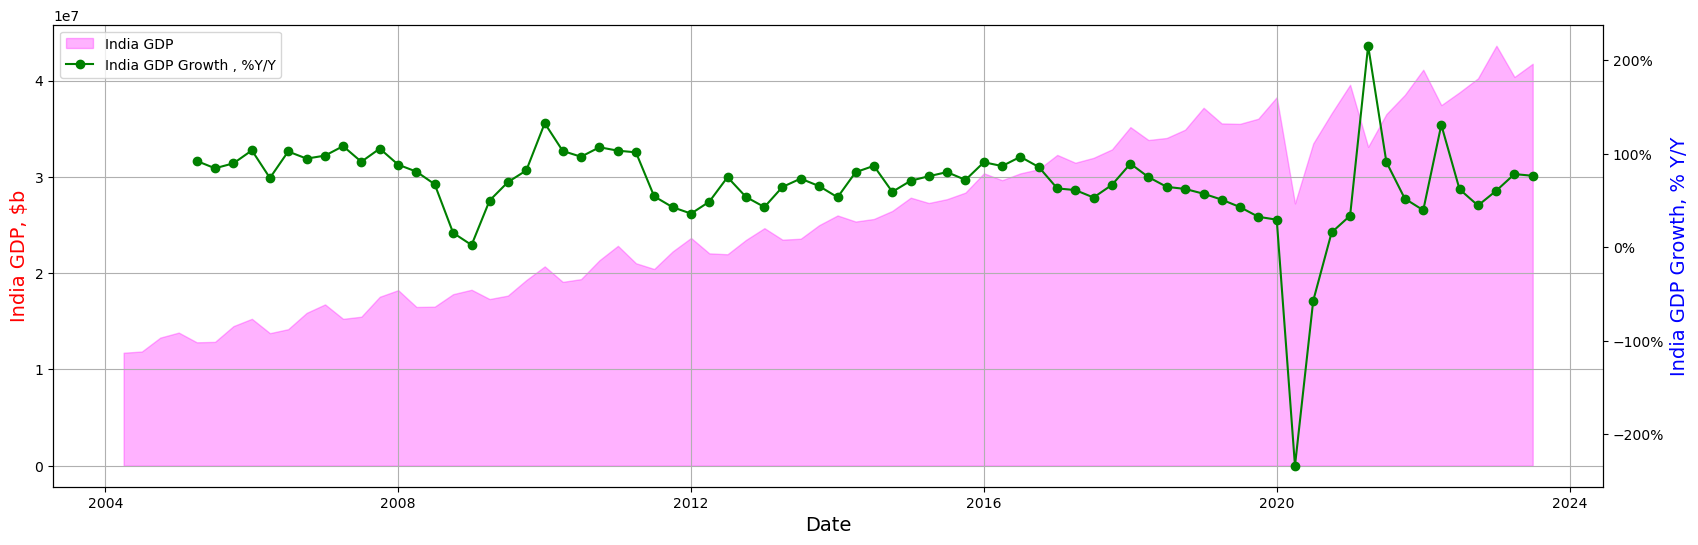

In [62]:
#Visual GDP India
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

fix,ax = plt.subplots(figsize=(20,6))
plt.grid(True)


#plotting area under indian GDP Curve
ax.fill_between(gdpIndia.index,gdpIndia.gdpIn,color="magenta",alpha = 0.3, label= "India GDP")

#Creating a secondary y-axis for GDP growth percentage
ax2 = ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(0.1))
ax2.plot(gdpIndia.gdpIn_yoy,color="green",marker="o",label="India GDP Growth , %Y/Y")


# Setting labels and title
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("India GDP, $b", color="red", fontsize=14)
ax2.set_ylabel("India GDP Growth, % Y/Y", color="blue", fontsize=14)

# Adding legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()


### 1.2) CPI

In [71]:
startCPI = date(year=end.year-30, month=end.month, day=end.day)

cpilfesl = pdr.DataReader("INDCPIALLMINMEI", "fred", start=startCPI)

In [72]:
cpilfesl['cpi_yoy'] = cpilfesl.INDCPIALLMINMEI/cpilfesl.INDCPIALLMINMEI.shift(12)-1
cpilfesl['cpi_mom'] = cpilfesl.INDCPIALLMINMEI/cpilfesl.INDCPIALLMINMEI.shift(1)-1

cpilfesl.tail(13)

,INDCPIALLMINMEI,cpi_yoy,cpi_mom
DATE,,,
2022-11-01,145.983203,0.054097,0.000000
2022-12-01,145.762851,0.055024,-0.001509
2023-01-01,146.313731,0.061551,0.003779
2023-02-01,146.203555,0.061600,-0.000753
2023-03-01,146.864611,0.057937,0.004521
2023-04-01,147.856195,0.050901,0.006752
2023-05-01,148.407075,0.044186,0.003726
2023-06-01,150.280067,0.055728,0.012621
2023-07-01,153.915875,0.075443,0.024194


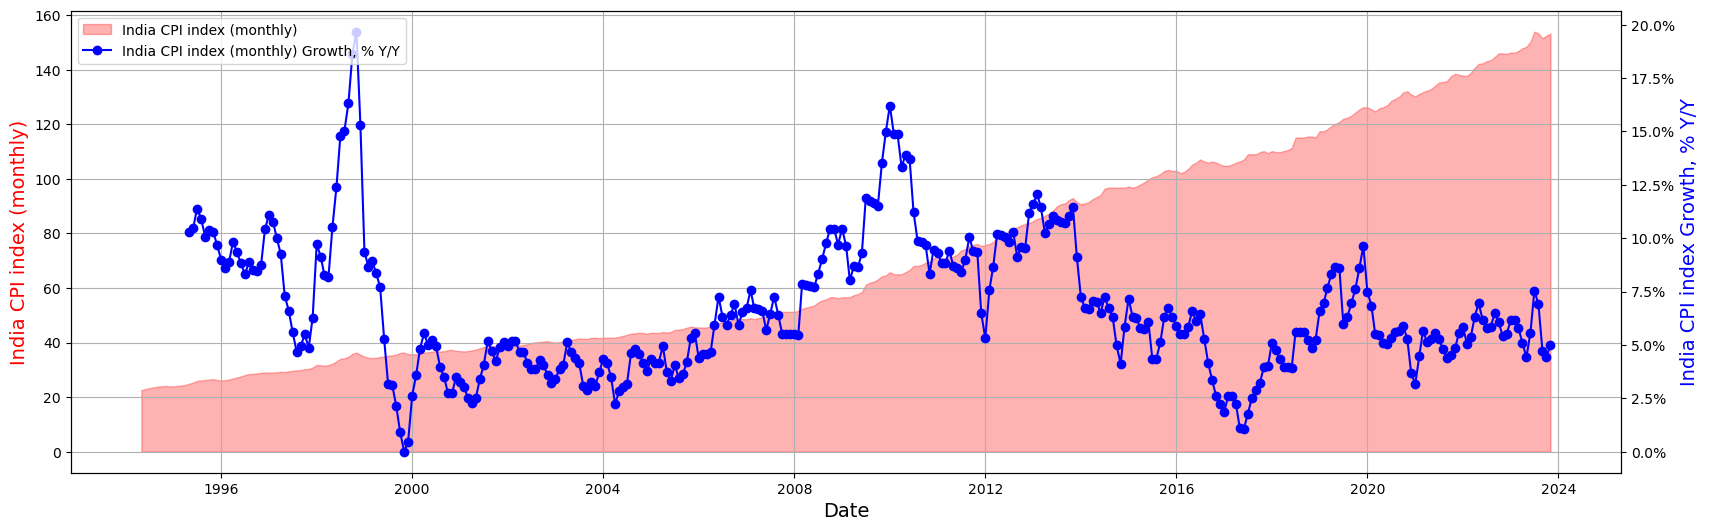

In [74]:
fig, ax = plt.subplots(figsize=(20, 6))
plt.grid(True)

# Plotting area under CPI
ax.fill_between(cpilfesl.index, cpilfesl.INDCPIALLMINMEI, color="red", alpha=0.3, label="India CPI index (monthly)")

# Creating a secondary y-axis for CPI growth percentage
ax2 = ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(cpilfesl.cpi_yoy, color="blue", marker="o", label="India CPI index (monthly) Growth, % Y/Y")

# Setting labels and title
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("India CPI index (monthly)", color="red", fontsize=14)
ax2.set_ylabel("India CPI index Growth, % Y/Y", color="blue", fontsize=14)

# Adding legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()
     

### 1.3 Nifty 500

In [108]:
snx_index = pdr.get_data_stooq('^SNX', startCPI, end)
snx_index.head()

,Open,High,Low,Close,Volume
Date,,,,,
2024-04-12,74889.64,74948.95,74214.69,74251.50,NaN
2024-04-10,74953.96,75098.07,74812.63,75038.15,7076019.0
2024-04-09,75124.28,75124.28,74604.08,74683.70,40992841.0
2024-04-08,74555.44,74866.48,74417.45,74742.50,8300553.0
2024-04-05,74287.02,74303.49,73964.48,74248.22,11302125.0


In [109]:
# 252 trading days a year
  # REVERSE ORDER OF THE DATA!!!
snx_index['spx_dod'] = (snx_index.Close/snx_index.Close.shift(-1)-1)
snx_index['spx_qoq'] = (snx_index.Close/snx_index.Close.shift(-63)-1)
snx_index['spx_yoy'] = (snx_index.Close/snx_index.Close.shift(-252)-1)

In [110]:
snx_index.head()

,Open,High,Low,Close,Volume,spx_dod,spx_qoq,spx_yoy
Date,,,,,,,,
2024-04-12,74889.64,74948.95,74214.69,74251.50,NaN,-0.010483,0.040590,0.258681
2024-04-10,74953.96,75098.07,74812.63,75038.15,7076019.0,0.004746,0.041818,0.294652
2024-04-09,75124.28,75124.28,74604.08,74683.70,40992841.0,-0.000787,0.039474,0.296283
2024-04-08,74555.44,74866.48,74417.45,74742.50,8300553.0,0.006657,0.047450,0.296401
2024-04-05,74287.02,74303.49,73964.48,74248.22,11302125.0,0.000277,0.032768,0.290665


In [111]:
snx_truncated = snx_index[snx_index.index>='1990-01-01']


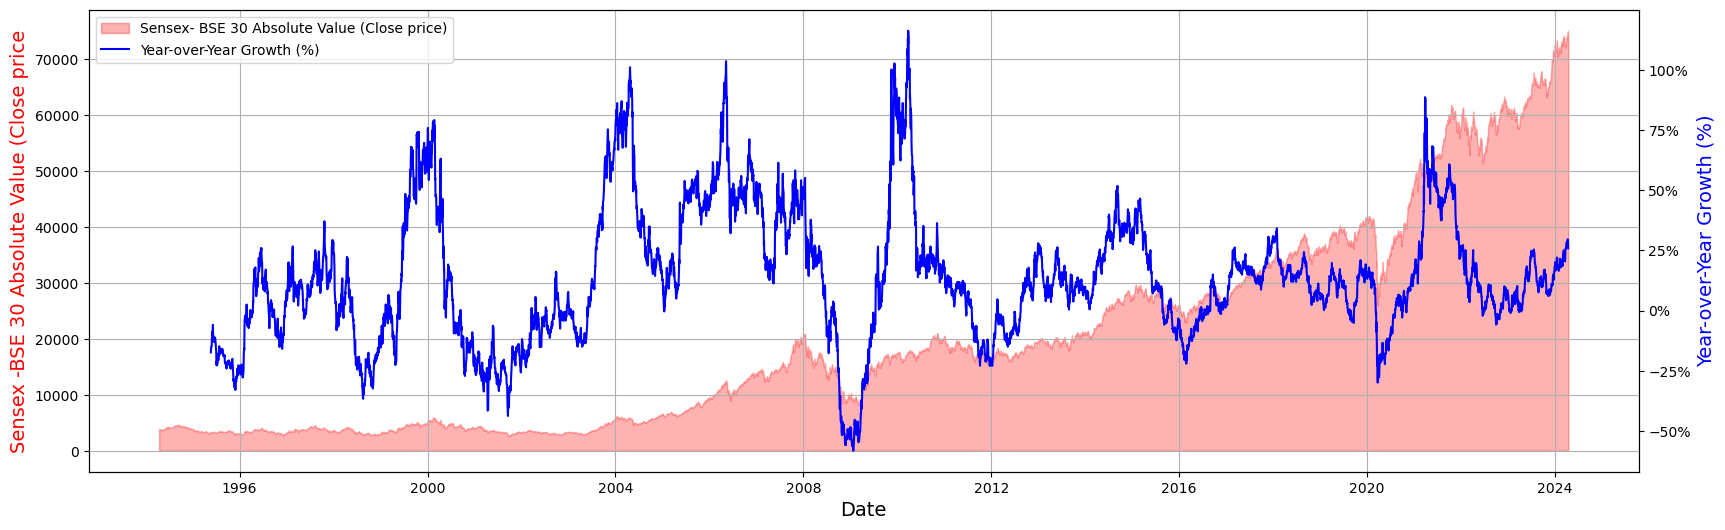

In [112]:
# S&P500 abs. vs. relative growth
fig, ax = plt.subplots(figsize=(20, 6))
plt.grid(True)

# Plotting area under CPI
ax.fill_between(snx_index.index, snx_index.Close, color="red", alpha=0.3, label="Sensex- BSE 30 Absolute Value (Close price)")

# Creating a secondary y-axis for CPI growth percentage
ax2 = ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(snx_index.spx_yoy,
         color="blue",
        #  marker=".",
         label="Year-over-Year Growth (%)")

# Setting labels and title
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Sensex -BSE 30 Absolute Value (Close price", color="red", fontsize=14)
ax2.set_ylabel("Year-over-Year Growth (%)", color="blue", fontsize=14)

# Adding legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

### 2) Data Sources for Stocks

In [113]:
nsei_daily = yf.download(tickers = "^NSEI",
                     period = "max",
                     interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [114]:
nsei_daily.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-08,22578.349609,22697.300781,22550.349609,22666.300781,22666.300781,227600
2024-04-09,22765.099609,22768.400391,22612.250000,22642.750000,22642.750000,232400
2024-04-10,22720.250000,22775.699219,22673.699219,22753.800781,22753.800781,276800
2024-04-12,22677.400391,22726.449219,22503.750000,22519.400391,22519.400391,357200
2024-04-15,22339.050781,22427.449219,22259.550781,22272.500000,22272.500000,0


In [116]:
# normally 252 trading days
nsei_daily['adj_close_last_year'] = nsei_daily['Adj Close'].shift(252)
nsei_daily['yoy_growth'] = nsei_daily['Adj Close'] / nsei_daily['adj_close_last_year'] -1

In [117]:
nsei_daily

,Open,High,Low,Close,Adj Close,Volume,adj_close_last_year,yoy_growth
Date,,,,,,,,
2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,4494.649902,0,NaN,NaN
2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,4546.200195,0,NaN,NaN
2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,4732.350098,0,NaN,NaN
2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,4747.549805,0,NaN,NaN
2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,4837.549805,0,NaN,NaN
...,...,...,...,...,...,...,...,...
2024-04-08,22578.349609,22697.300781,22550.349609,22666.300781,22666.300781,227600,16985.699219,0.334434
2024-04-09,22765.099609,22768.400391,22612.250000,22642.750000,22642.750000,232400,16951.699219,0.335722
2024-04-10,22720.250000,22775.699219,22673.699219,22753.800781,22753.800781,276800,17080.699219,0.332135


<Axes: xlabel='Date'>

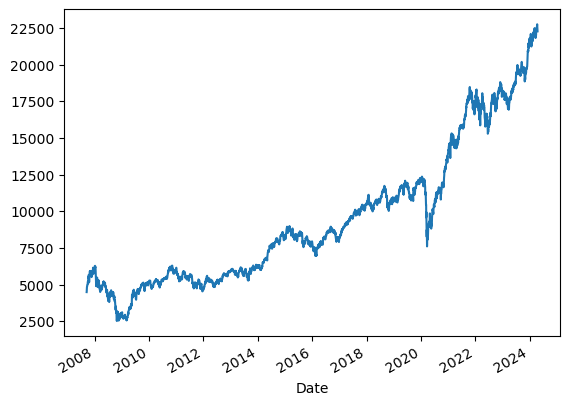

In [118]:
nsei_daily['Adj Close'].plot.line()

In [120]:
# Nifty 500: Chicago Options - Chicago Options Delayed Price. Currency in USD
nifty_500 = yf.download(tickers = "^CRSLDX",
                     period = "max",
                     interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [123]:
nifty_500.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-08,20806.849609,20866.099609,20768.500000,20819.099609,20819.099609,27481500
2024-04-09,20912.750000,20912.750000,20741.500000,20790.699219,20790.699219,22792400
2024-04-10,20864.550781,20933.849609,20822.849609,20915.199219,20915.199219,25719500
2024-04-12,20873.199219,20931.400391,20735.150391,20745.500000,20745.500000,32597400
2024-04-15,20493.300781,20623.800781,20362.300781,20478.750000,20478.750000,0


In [124]:
epi_etf_daily = yf.download(tickers = "EPI",
                     period = "max",
                     interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [125]:
epi_etf_daily.head()
print(epi_etf_daily.shape)


(4062, 6)


In [126]:
epi_etf_daily[(epi_etf_daily.index >='2023-06-23') & (epi_etf_daily.index <='2023-06-28')]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-23,34.029999,34.150002,33.930000,34.020000,33.960003,344100
2023-06-26,34.110001,34.160000,34.049999,34.080002,34.080002,634600
2023-06-27,34.279999,34.310001,34.230000,34.310001,34.310001,417100
2023-06-28,34.410000,34.529999,34.389999,34.529999,34.529999,454400


In [127]:
epi_etf_daily[(epi_etf_daily.index >='2022-06-23') & (epi_etf_daily.index <='2022-06-28')]


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-06-23,31.129999,31.26,31.000000,31.200001,29.303230,607700
2022-06-24,29.549999,29.91,29.500000,29.900000,29.847267,387900
2022-06-27,29.799999,29.82,29.660000,29.709999,29.657600,225400
2022-06-28,29.709999,29.76,29.389999,29.420000,29.368114,466600


<Axes: title={'center': "EPI's etf stock price"}, xlabel='Date'>

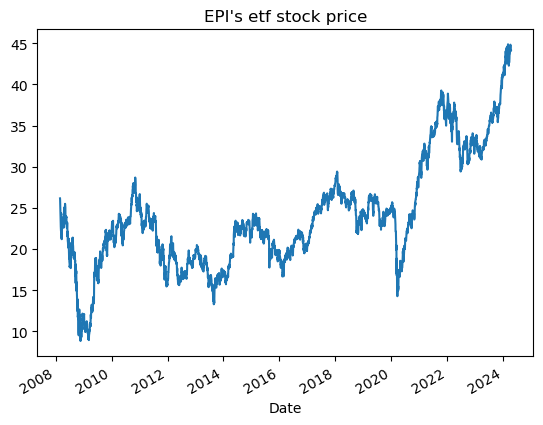

In [128]:
epi_etf_daily['Close'].plot(title="EPI's etf stock price")


In [129]:

# get actions, incl. dividends - as a dataFrame
epi = yf.Ticker('EPI')
epi.get_actions()

,Dividends,Stock Splits,Capital Gains
Date,,,
2008-12-22 00:00:00-05:00,0.091,0.0,0.0
2009-03-23 00:00:00-04:00,0.007,0.0,0.0
2009-06-22 00:00:00-04:00,0.002,0.0,0.0
2009-09-21 00:00:00-04:00,0.045,0.0,0.0
2009-12-21 00:00:00-05:00,0.006,0.0,0.0
2010-06-28 00:00:00-04:00,0.065,0.0,0.0
2010-09-20 00:00:00-04:00,0.065,0.0,0.0
2010-12-22 00:00:00-05:00,0.013,0.0,0.0
2011-06-22 00:00:00-04:00,0.062,0.0,0.0
